In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:

# Load dataset
df = pd.read_csv("Virat-Kohli-International-Cricket-Centuries.csv") 
df.columns.str.strip()

# Strip leading/trailing spaces from all columns
df.columns = df.columns.str.strip()

# Drop non-numeric columns that aren't useful for regression (e.g. 'Date', 'Venue')
df = df.drop(['Date', 'Venue'], axis=1)

In [4]:


# Clean and preprocess the data
df['Result'] = df['Result'].str.strip()  # Remove leading/trailing spaces from 'Result'

In [5]:


# Encode categorical columns using LabelEncoder
le_result = LabelEncoder()
df['Result'] = le_result.fit_transform(df['Result'])

# Check if 'Opposition' or other categorical columns exist, and encode them
if 'Opposition' in df.columns:
    df['Opposition'] = df['Opposition'].str.strip()  # Remove leading/trailing spaces
    le_opposition = LabelEncoder()
    df['Opposition'] = le_opposition.fit_transform(df['Opposition'])


In [6]:


# Check for any other categorical columns and encode if necessary
# Iterate through columns and apply encoding if the column is object type
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Runs':  # We don't want to encode the target column
        df[col] = df[col].str.strip()  # Strip spaces
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Now all categorical columns are encoded, and the dataset should be numeric for the regression models.


In [7]:

# Choose features (X) and target (y)
X = df.drop(columns=["Runs"])
y = df["Runs"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [9]:

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, Mean Absolute Error: {mae:.2f}, R^2: {r2:.2f}")
    

Linear Regression - Mean Squared Error: 1127.77, Mean Absolute Error: 24.36, R^2: 0.12
Decision Tree - Mean Squared Error: 2366.31, Mean Absolute Error: 31.44, R^2: -0.85
Random Forest - Mean Squared Error: 1433.63, Mean Absolute Error: 23.88, R^2: -0.12


Linear Regression - Mean Squared Error: 1127.77, Mean Absolute Error: 24.36, R^2: 0.12


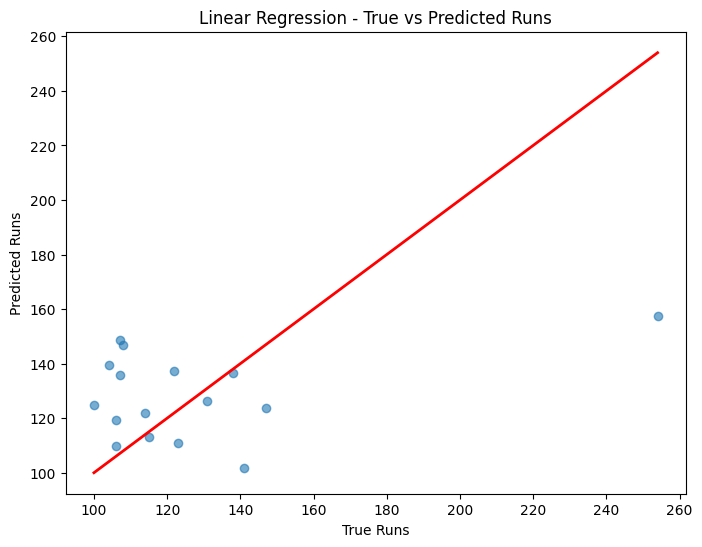

Decision Tree - Mean Squared Error: 1859.44, Mean Absolute Error: 27.56, R^2: -0.45


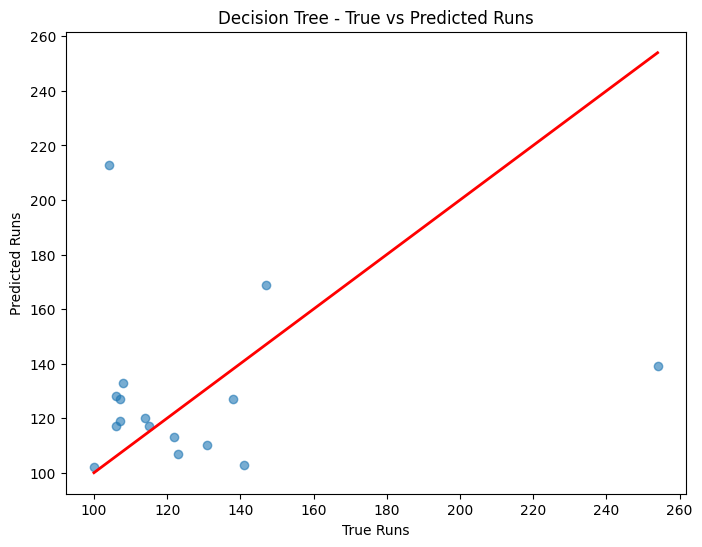

Random Forest - Mean Squared Error: 1433.63, Mean Absolute Error: 23.88, R^2: -0.12


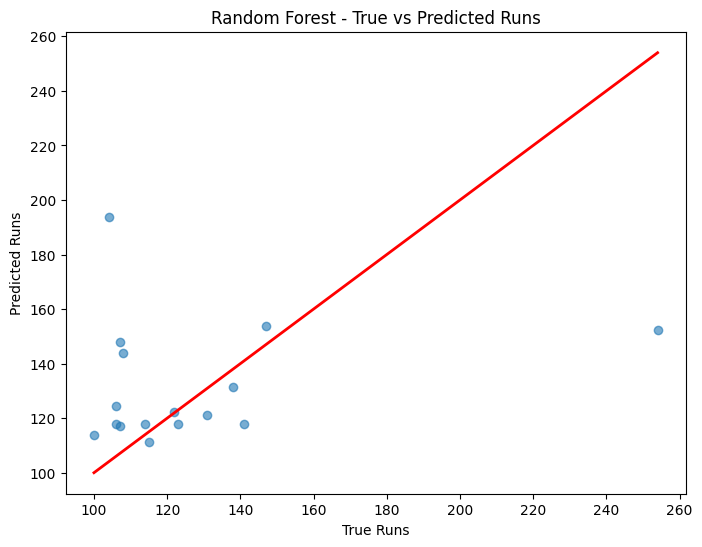

In [10]:


# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, Mean Absolute Error: {mae:.2f}, R^2: {r2:.2f}")
    
    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
    plt.title(f'{model_name} - True vs Predicted Runs')
    plt.xlabel('True Runs')
    plt.ylabel('Predicted Runs')
    plt.show()
